In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
from IPython.display import display, Math
from sympy import latex

# Explanation draft_v2

The following document explains and tests the use of the document draft_v2. 

## Step 1.

Import of the draft_v2 document.

In [2]:
import draft_v2

**OGRePy: An <u>O</u>bject-Oriented <u>G</u>eneral <u>Re</u>lativity Package for <u>Py</u>thon\
By [Barak Shoshany](https://github.com/bshoshany) ([baraksh@gmail.com](mailto:baraksh@gmail.com)) ([baraksh.com](https://baraksh.com/))\
v1.2.0 (2024-09-15)\
GitHub repository: <https://github.com/bshoshany/OGRePy>\
Documentation: <a href="c:/Users/lukas/AppData/Local/Programs/Python/Python313/Lib/site-packages/OGRePy/docs/OGRePy_Documentation.ipynb">.ipynb</a>, <a href="c:/Users/lukas/AppData/Local/Programs/Python/Python313/Lib/site-packages/OGRePy/docs/OGRePy_Documentation.pdf">.pdf</a>, <a href="#" onclick="window.open('file:///c:/Users/lukas/AppData/Local/Programs/Python/Python313/Lib/site-packages/OGRePy/docs/OGRePy_Documentation.html', '_blank')">.html</a>**

**OGRePy**: A new version of the package is available: **v1.3.0** ([view changelog](https://github.com/bshoshany/OGRePy/blob/master/CHANGELOG.md)). To update, please execute the following commands in a notebook cell:
```
%pip install --upgrade OGRePy
%reset --aggressive -f
from OGRePy import *
```

## Step 2.

Firstly, the functions of the desired metric should be defined:

In [3]:
# defining the functions f, g and h 
def functions(r, M):
    R_s = 2 * M

    f =  1 - R_s / sp.sqrt(r**2)
    g =  (1 - R_s / sp.sqrt(r**2))**(-1)
    h = r**2 

    return f, g, h

f = lambda r, M: functions(r, M)[0]
g = lambda r, M: functions(r, M)[1]
h = lambda r, M: functions(r, M)[2]

## Step. 3 
 
Definition of the metric itself using draft_v2.MetricSystem(f, g, h, param)

In [4]:
M = 1

Schwarzschield = draft_v2.MetricSystem(f, g, h, M)


## Step. 4
Defining a black hole, with mass and metric system. 

In [5]:
BlackHole =  draft_v2.BH(M, [Schwarzschield], ['Schwarzschield'])

BlackHole.Schwarzschield()


$$\eta{}_{\mu}{}_{\nu}\Bigg|_{\left(t, r, \theta, \phi\right)} = \left(\begin{matrix}-1 + \frac{2}{r} & 0 & 0 & 0\\0 & \frac{1}{1 - \frac{2}{r}} & 0 & 0\\0 & 0 & r^{2} & 0\\0 & 0 & 0 & r^{2} \sin^{2}{\left(\theta \right)}\end{matrix}\right)$$

(Further metrics can be added with add_Metric_sys)

## Step. 5 Effective potential

In [ ]:
r_span=[2 * M + 0.01, (2 * M + 0.01) * 14]
r_list = np.array(np.linspace(r_span[0], r_span[1], 1000))

V_eff_expr = BlackHole.Schwarzschield.V_eff()

display(Math(fr'\begin{{align}} V_\text{{eff}} (r) = {latex(V_eff_expr)} \end{{align}}'))

 

<IPython.core.display.Math object>

-1.0

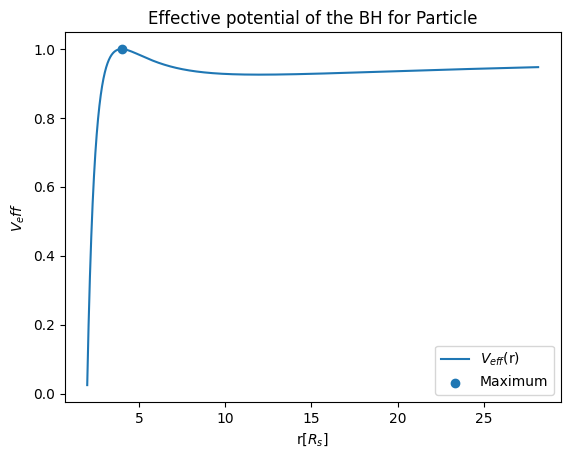

In [12]:
L = 4

V_eff_list = V_eff_expr = BlackHole.Schwarzschield.V_eff(r_list, -1, L)

V_min, V_max = BlackHole.Schwarzschield.min_max_V_eff(-1, L)

fig, ax = plt.subplots()

ax.plot(r_list, V_eff_list, label=fr'$V_{{eff}}$(r)')  

ax.scatter(V_max[0], float(BlackHole.Schwarzschield.V_eff(V_max[0], -1, L)), label='Maximum')
#ax.scatter(V_min[0], float(BlackHole.Schwarzschield.V_eff(V_min[0], -1, L)), label='Minimum')


ax.set_title('Effective potential of the BH for Particle') 
ax.set_xlabel('r[$R_s$]')
ax.set_ylabel('$V_eff$') 

ax.legend()

plt.show()

## Step 6. Orbits

In [9]:
dphi_expr = BlackHole.Schwarzschield.dphi_dr()

display(Math(fr'\begin{{align}} \frac{{d \varphi}}{{d r}} (r) = {latex(dphi_expr)} \end{{align}}'))

<IPython.core.display.Math object>

In [10]:
phi_list = BlackHole.Schwarzschield.phi(r_list, r_span, sigma=-1, L=L, E=2) # There is still a mistake here

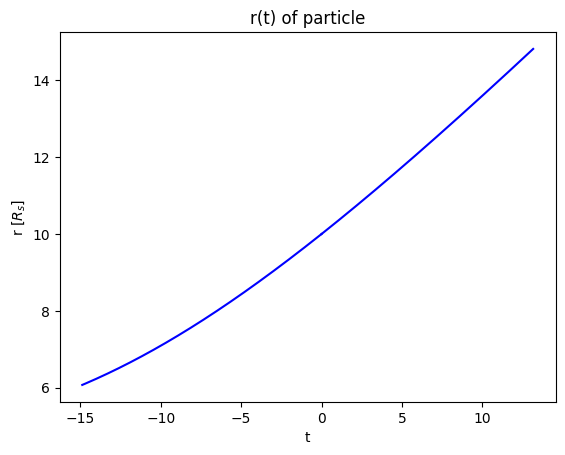

In [130]:
tau_span = [0, 10]
tau_list = np.linspace(tau_span[0], tau_span[1], 1000)

sp, sn, fall_In = BlackHole.Schwarzschield.solve_DAE(tau_list, tau_span, sigma = -1, r_0=10, L = 5, E = 1.1)

fig, ax = plt.subplots()

ax.plot(sp[0], sp[1], c= 'blue')  
ax.plot(sn[0], sn[1], c= 'blue')  

ax.set_title('r(t) of particle') 
ax.set_xlabel('t')
ax.set_ylabel('r [$R_s$]') 


plt.show()

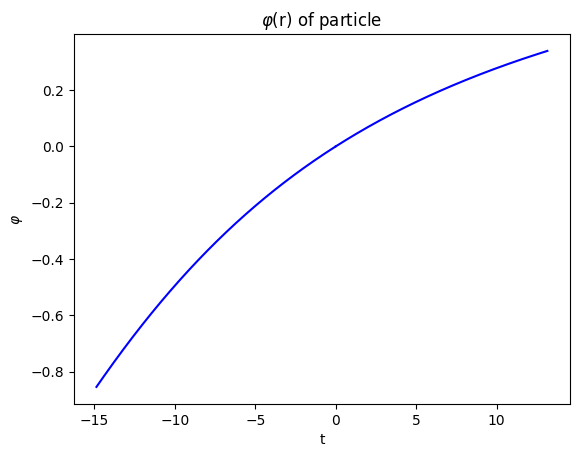

In [129]:
fig, ax = plt.subplots()

ax.plot(sp[0], sp[2], c= 'blue')  
ax.plot(sn[0], sn[2], c= 'blue')  

ax.set_title(rf'$\varphi$(r) of particle') 
ax.set_xlabel('t')
ax.set_ylabel(rf'$\varphi$') 

plt.show()